# Notebook for data-profiling of the di-f experiments

In [83]:
%load_ext autoreload
%autoreload 2
# The %load_ext autoreload and %autoreload 2 magic commands are used to automatically 
# reload modules when they are changed. This can be useful when you are developing code 
# in an interactive environment, as it allows you to see the changes you make to your modules 
# without having to restart the kernel.
import os
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from omegaconf import OmegaConf

# for global initialization: NOT RECOMMENDED
#initialize(version_base=None, config_path="../src/conf")
#compose(config_name='config')

with initialize(version_base=None, config_path="../src/conf"):
    cfg = compose(config_name='config')
    print(cfg)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'general_ml': {'seed': 123, 'encoding': 'iso-8859-1', 'cloud': 'AWS'}, 'paths': {'project_dir': '...', 'raw_data': '${hydra:runtime.cwd}/data/raw', 'interim_data': '${hydra:runtime.cwd}/data/interim', 'processed_data': '${hydra:runtime.cwd}/data/processed', 'reports': '${hydra:runtime.cwd}/reports'}, 'cloud_paths': {'bucket_path': 'dif-b-democlient-sklearn', 'experiment_path': '${cloud_paths.bucket_path}/mxretailsalary1', 'mlflow_path': '${cloud_paths.experiment_path}/mlflow', 'reports_path': '${cloud_paths.experiment_path}/reports', 'rawdata_path': '${cloud_paths.experiment_path}/raw-data', 'dvc_path': '${cloud_paths.experiment_path}/dvc-store'}, 'file_names': {'raw_file': 'raw-data.csv', 'data_file': 'datafile.csv', 'train_features': 'train_features.csv', 'train_labels': 'train_labels.csv', 'validation_features': 'valid_features.csv', 'validation_labels': 'valid_labels.csv', 'test_features': 'tes

In [84]:
import pandas as pd
import numpy as np
import ydata_profiling as yp
import os

In [85]:
data = pd.read_csv(os.path.join('../data/raw', cfg.file_names.raw_file), 
                   #encoding=cfg.general_ml.encoding,
                   )
data.head()

,estado,municipio,businesses,employees,Payroll,expenditures,income,payroll_employee_day,profits_biz_day,sales_employee_day,employees_unit
0,Ags,Aguascalientes,11402,120923,4997.813674,129044.643300,159695.334000,114.807074,6249.604612,3668.434872,10.6054201
1,Ags,Asientos,231,1647,29.092255,524.807734,621.055144,49.066071,807.5415528,1047.451838,7.12987013
2,Ags,Calvillo,591,4605,99.342787,1743.278407,2246.247441,59.924470,1897.09648,1354.956835,7.791878173
3,Ags,Cosio,104,468,4.577495,101.941048,136.364948,27.169366,797.1796419,809.383597,4.5
4,Ags,El Llano,104,860,14.802274,342.630524,427.291666,47.810963,1865.888567,1380.141041,8.269230769


In [86]:
#cutting dataset to this experiment
data=data[['estado',
        'municipio',
        'businesses',
        'employees',
        'income',
        'Payroll',
            ]]
data

,estado,municipio,businesses,employees,income,Payroll
0,Ags,Aguascalientes,11402,120923,159695.334000,4997.813674
1,Ags,Asientos,231,1647,621.055144,29.092255
2,Ags,Calvillo,591,4605,2246.247441,99.342787
3,Ags,Cosio,104,468,136.364948,4.577495
4,Ags,El Llano,104,860,427.291666,14.802274
...,...,...,...,...,...,...
2482,Zacatecas,Villa Garcia,147,785,160.114046,2.811121
2483,Zacatecas,Villa Gonzalez Ortega,149,875,289.174975,4.875017
2484,Zacatecas,Villa Hidalgo,96,604,219.851736,7.800028
2485,Zacatecas,Villanueva,339,2043,1282.438977,34.189010


In [87]:
#lets find cero
data['businesses']=data['businesses'].astype('float64')
data['employees']=data['employees'].astype('float64')
data.loc[data['businesses'] == 0, 'businesses'] = 1.0
data.loc[data['employees'] == 0, 'employees'] = 1.0

In [88]:
    
#Choose the Ml model to be applied, among: regression, Classifications, time_series, Clustering, NLP
from pycaret.regression import *

In [89]:
#droping rows with missing values in labels (because is regression)
data=data.dropna()
data

,estado,municipio,businesses,employees,income,Payroll
0,Ags,Aguascalientes,11402.0,120923.0,159695.334000,4997.813674
1,Ags,Asientos,231.0,1647.0,621.055144,29.092255
2,Ags,Calvillo,591.0,4605.0,2246.247441,99.342787
3,Ags,Cosio,104.0,468.0,136.364948,4.577495
4,Ags,El Llano,104.0,860.0,427.291666,14.802274
...,...,...,...,...,...,...
2482,Zacatecas,Villa Garcia,147.0,785.0,160.114046,2.811121
2483,Zacatecas,Villa Gonzalez Ortega,149.0,875.0,289.174975,4.875017
2484,Zacatecas,Villa Hidalgo,96.0,604.0,219.851736,7.800028
2485,Zacatecas,Villanueva,339.0,2043.0,1282.438977,34.189010


In [90]:
data['income_employee_day']=data['income']*1000000/data['employees']/360
data['employees_business'] = (data['employees']/data['businesses']+0.5).astype(int)
data['salary_employee_day']=data['Payroll']*1000000/data['employees']/360
data=data.drop(['municipio', 'employees', 'income','businesses','Payroll'],axis=1)
#data=data.drop(['employees_business','income_employee_day','salary_employee_day'],axis=1)
data.head()

,estado,income_employee_day,employees_business,salary_employee_day
0,Ags,3668.434872,11,114.807074
1,Ags,1047.451838,7,49.066071
2,Ags,1354.956835,8,59.924470
3,Ags,809.383597,5,27.169366
4,Ags,1380.141041,8,47.810963


In [91]:
#to show docstring of setup() function
?setup

Signature:
setup(
    data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame]]] = None,
    target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1,
    index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True,
    train_size: float = 0.7,
    test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    ordinal_features: Optional[Dict[str, list]] = None,
    numeric_features: Optional[List[str]] = None,
    categorical_features: Optional[List[str]] = None,
    date_features: Optional[List[str]] = None,
    text_features: Optional[List[str]] = None,
    ignore_features: Optional[List[str]] = None,
    keep_features: Optional[List[str]] = None,
    preprocess: 

In [92]:
model_to_find =   setup(data = data, #see above 
#                        log_experiment = True,
#                        experiment_name = f'{cfg.general_ml.client}-{cfg.general_ml.project}-{cfg.general_ml.experiment}',
#                        target = cfg.data_fields.label, # get the target label from cfg
                        target='salary_employee_day',
                        train_size=0.75, #default = 0.7
#                        session_id=cfg.general_ml.seed, # get the seed from config
#                        train_size = 1.0-float(cfg.data_pipeline.data_transform_params.percent_valid), #get %valid from cfg
                        transformation=True, 
#                        fix_imbalance = True, #8:2
                        normalize=True,
                        #normalize_method="minmax",
                        polynomial_features=True,
                        polynomial_degree = 3,
                        max_encoding_ohe = 32, #default=25,
                        remove_multicollinearity=True,
                        remove_outliers=True,
                        outliers_threshold=0.075, #default=0.05
                        )

,Description,Value
0,Session id,2677
1,Target,salary_employee_day
2,Target type,Regression
3,Original data shape,"(2196, 4)"
4,Transformed data shape,"(2072, 7501)"
5,Transformed train set shape,"(1523, 7501)"
6,Transformed test set shape,"(549, 7501)"
7,Numeric features,2
8,Categorical features,1
9,Preprocess,True


In [93]:
best_model=compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:18:41
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
# And create the selected model in ten kfolds

selected_model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.0263,892.0033,29.8664,0.5835,0.6154,0.8793
1,12.6029,607.2578,24.6426,0.6370,0.5459,0.7651
2,11.4507,400.5293,20.0132,0.6980,0.5369,0.7261
3,13.2034,851.7607,29.1849,0.6063,0.5866,0.9091
4,12.9818,653.8885,25.5712,0.5490,0.5059,0.6491
5,14.0773,777.3923,27.8818,0.4900,0.6117,1.0497
6,10.8088,371.6743,19.2789,0.6536,0.5642,0.7636
7,12.6805,558.2777,23.6279,0.5253,0.6527,1.7551
8,12.2834,379.4365,19.4791,0.6827,0.6056,0.8163


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Now lets find the best hyperparameters for the selected model 

tuned_model = tune_model(selected_model)



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.9175,891.6278,29.8601,0.5837,0.6573,1.0149
1,12.4107,511.2430,22.6107,0.6944,0.5537,0.8651
2,12.8881,460.7992,21.4662,0.6526,0.6203,0.8713
3,14.2561,870.0691,29.4969,0.5979,0.6417,1.1437
4,12.4473,573.0391,23.9382,0.6047,0.5445,0.7440
5,12.9625,548.9581,23.4299,0.6399,0.6144,1.2936
6,10.9595,298.5344,17.2781,0.7218,0.5930,0.8728
7,12.6401,510.2202,22.5881,0.5661,0.6653,1.7174
8,12.8084,439.7214,20.9695,0.6322,0.6267,0.8628


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


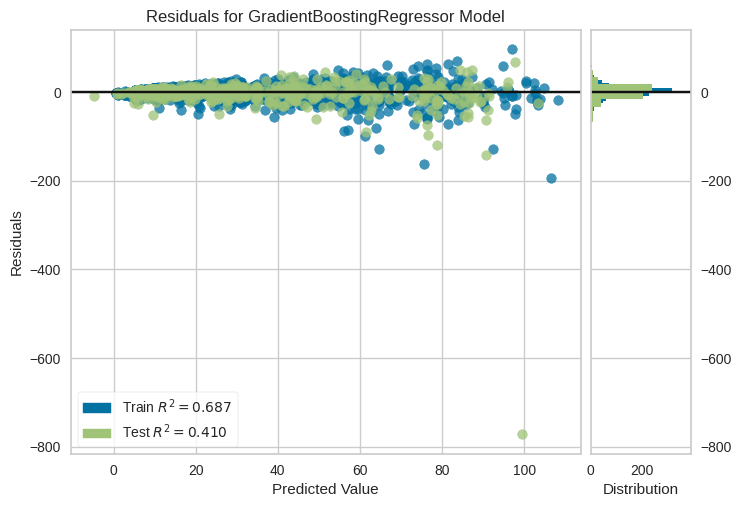

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# and .. evaluate the model

plot_model(tuned_model)
evaluate_model(tuned_model)



In [ ]:
# Finally trains a the model on the entire dataset including the hold-out set.

final_model = finalize_model(tuned_model)
final_model




Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['income_employee_day',
                                             'employees_business'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['estado'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['estado'],
                                    t...
                                                               threshold=0.075))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('actual_estimator',
                 GradientBoostingRegressor(max_depth=1, max_features='sqrt',
                                           min_impurity_decrease=0.3,
                                           min_samples_leaf=5,
                                           min_samples_split=5,
                                           n_estimators=240, random_state=4344,
                                           subsample=0.8))])

In [ ]:
# save the model

save_model(final_model, os.path.join(cfg.paths.models, cfg.file_names.ml_profiling_model))


type: Key 'models' is not in struct
    full_key: paths.models
    object_type=dict